# Scikit-learn Implementation

## Reading the dataset

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

data_print = np.c_[X,y]
print('DataSet:\n', data_print)
print('Label Names:\n', list(enumerate(iris.target_names)))

DataSet:
 [[1.4 0.2 0. ]
 [1.4 0.2 0. ]
 [1.3 0.2 0. ]
 [1.5 0.2 0. ]
 [1.4 0.2 0. ]
 [1.7 0.4 0. ]
 [1.4 0.3 0. ]
 [1.5 0.2 0. ]
 [1.4 0.2 0. ]
 [1.5 0.1 0. ]
 [1.5 0.2 0. ]
 [1.6 0.2 0. ]
 [1.4 0.1 0. ]
 [1.1 0.1 0. ]
 [1.2 0.2 0. ]
 [1.5 0.4 0. ]
 [1.3 0.4 0. ]
 [1.4 0.3 0. ]
 [1.7 0.3 0. ]
 [1.5 0.3 0. ]
 [1.7 0.2 0. ]
 [1.5 0.4 0. ]
 [1.  0.2 0. ]
 [1.7 0.5 0. ]
 [1.9 0.2 0. ]
 [1.6 0.2 0. ]
 [1.6 0.4 0. ]
 [1.5 0.2 0. ]
 [1.4 0.2 0. ]
 [1.6 0.2 0. ]
 [1.6 0.2 0. ]
 [1.5 0.4 0. ]
 [1.5 0.1 0. ]
 [1.4 0.2 0. ]
 [1.5 0.1 0. ]
 [1.2 0.2 0. ]
 [1.3 0.2 0. ]
 [1.5 0.1 0. ]
 [1.3 0.2 0. ]
 [1.5 0.2 0. ]
 [1.3 0.3 0. ]
 [1.3 0.3 0. ]
 [1.3 0.2 0. ]
 [1.6 0.6 0. ]
 [1.9 0.4 0. ]
 [1.4 0.3 0. ]
 [1.6 0.2 0. ]
 [1.4 0.2 0. ]
 [1.5 0.2 0. ]
 [1.4 0.2 0. ]
 [4.7 1.4 1. ]
 [4.5 1.5 1. ]
 [4.9 1.5 1. ]
 [4.  1.3 1. ]
 [4.6 1.5 1. ]
 [4.5 1.3 1. ]
 [4.7 1.6 1. ]
 [3.3 1.  1. ]
 [4.6 1.3 1. ]
 [3.9 1.4 1. ]
 [3.5 1.  1. ]
 [4.2 1.5 1. ]
 [4.  1.  1. ]
 [4.7 1.4 1. ]
 [3.6 1.3 1. ]
 [4.4 1.4 1. ]


### Visualizing the Dataset

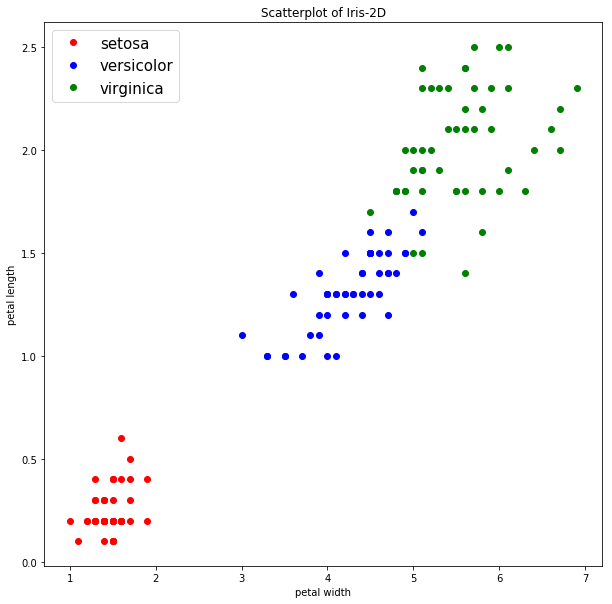

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline
pos_0 = np.where(y == 0)[0]
pos_1 = np.where(y == 1)[0]
pos_2 = np.where(y == 2)[0]

plt.figure(figsize=(10, 10))
plt.plot(X[pos_0, 0], X[pos_0, 1], 'ro', label='setosa')
plt.plot(X[pos_1, 0], X[pos_1, 1], 'bo', label='versicolor')
plt.plot(X[pos_2, 0], X[pos_2, 1], 'go', label='virginica')

plt.title('Scatterplot of Iris-2D')
plt.xlabel('petal width')
plt.ylabel('petal length')

plt.legend(loc=2, prop={'size': 15})
plt.show()

## Splitting into Train and Test Sets

In [3]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.3) #Test_Set = 25% by default

train_print = np.c_[X_train, y_train]
test_print = np.c_[X_test, y_test]

# print("Training Set:\n", train_print)
# print("Test Set:\n", test_print)

## Training The Decision Tree Classifier

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Making Predictions on the Test Set

In [5]:
# print(tree_clf.predict_proba(X_test))
y_predicted = tree_clf.predict(X_test)

print('Predicted Results:\n', y_predicted)
print('Actual Results:\n', y_test)



Predicted Results:
 [1 2 0 2 2 1 0 0 1 1 1 2 2 2 1 1 1 1 1 0 1 0 1 2 1 1 2 2 2 2 0 0 1 1 2 1 1
 1 2 1 2 2 0 2 2]
Actual Results:
 [1 1 0 2 1 1 0 0 1 1 1 2 2 2 1 1 1 1 1 0 1 0 1 1 1 1 2 2 2 2 0 0 1 1 1 1 1
 1 2 1 2 2 0 2 2]


## Analysis

In [6]:
from sklearn.metrics import classification_report, confusion_matrix  

total = len(y_test)
correct = len(np.where(y_predicted == y_test)[0])
print('Total Test Examples: ', total)
print('Correct: ', correct)

print('Accuracy:', correct/total * 100)

print('\n\nConfusion Matrix:\n', confusion_matrix(y_test, y_predicted))  
print('\n\nClassification Report:\n', classification_report(y_test, y_predicted))

Total Test Examples:  45
Correct:  41
Accuracy: 91.11111111111111


Confusion Matrix:
 [[ 8  0  0]
 [ 0 20  4]
 [ 0  0 13]]


Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      0.83      0.91        24
          2       0.76      1.00      0.87        13

avg / total       0.93      0.91      0.91        45

